In [68]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import re
from sklearn.metrics import classification_report, accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
import graphviz
from sklearn.model_selection import KFold
import warnings
import plotly.express as px
from sklearn.model_selection import cross_val_score

np.random.seed(2)
warnings.filterwarnings(action="always")

In [21]:
#reading the csv files
train_data=pd.read_csv('yelp242_train.csv')
test_data=pd.read_csv('yelp242_test.csv')

In [22]:
#quick look at the data
train_data.head()

,stars,review_count,GoodForKids,Alcohol,BusinessAcceptsCreditCards,WiFi,BikeParking,ByAppointmentOnly,WheelechairAccessible,OutdoorSeating,RestaurantsReservations,DogsAllowed,Caters
0,3.5,79,FALSE,'full_bar',TRUE,'no',(Missing),(Missing),(Missing),FALSE,TRUE,(Missing),FALSE
1,4.5,339,TRUE,'beer_and_wine',TRUE,'no',TRUE,(Missing),(Missing),FALSE,FALSE,(Missing),FALSE
2,4.0,108,TRUE,'none',TRUE,'free',FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE
3,4.5,106,FALSE,'full_bar',TRUE,(Missing),(Missing),(Missing),(Missing),TRUE,TRUE,FALSE,(Missing)
4,3.0,3,TRUE,(Missing),(Missing),(Missing),(Missing),(Missing),(Missing),(Missing),(Missing),(Missing),(Missing)


In [23]:
#looking at the distribution for one specific feature
dict(pd.value_counts((train_data["BusinessAcceptsCreditCards"])))

{'TRUE': 5790, '(Missing)': 391, 'FALSE': 91}

/Users/ghitaalami/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:340: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(s, dtype=np.float)
/Users/ghitaalami/opt/anaconda3/lib/python3.7/site-packages/seaborn/utils.py:538: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(values).astype(np.float)


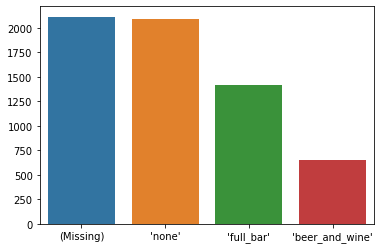

In [24]:
# plotting the histogram of values for the comments about Alcohol 
# in the train data
plt.figure()
valus=pd.value_counts(train_data["Alcohol"])
sns.barplot(valus.keys(), list(valus))
plt.show()

/Users/ghitaalami/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:340: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(s, dtype=np.float)
/Users/ghitaalami/opt/anaconda3/lib/python3.7/site-packages/seaborn/utils.py:538: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(values).astype(np.float)


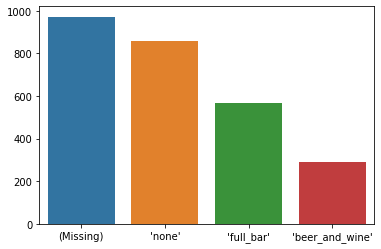

In [25]:
# plotting the histogram of values for the comments about Alcohol 
# in the test data
plt.figure()
valus=pd.value_counts(test_data["Alcohol"])
sns.barplot(valus.keys(), list(valus))
plt.show()

In [26]:
#plotting the missing rate in the training data
train_data[train_data=='(Missing)'].count()/len(train_data)

stars                         0.000000
review_count                  0.000000
GoodForKids                   0.301658
Alcohol                       0.336894
BusinessAcceptsCreditCards    0.062341
WiFi                          0.323661
BikeParking                   0.292092
ByAppointmentOnly             0.883291
WheelechairAccessible         0.740753
OutdoorSeating                0.270568
RestaurantsReservations       0.311543
DogsAllowed                   0.725128
Caters                        0.335619
dtype: float64

In [27]:
#plotting the missing rate in the test data
test_data[test_data=='(Missing)'].count()/len(test_data)

stars                         0.000000
review_count                  0.000000
GoodForKids                   0.302455
Alcohol                       0.361607
BusinessAcceptsCreditCards    0.059524
WiFi                          0.338914
BikeParking                   0.297991
ByAppointmentOnly             0.867560
WheelechairAccessible         0.752604
OutdoorSeating                0.291667
RestaurantsReservations       0.326265
DogsAllowed                   0.729539
Caters                        0.354167
dtype: float64

# Missing entries

There are many missing entries in this dataset, denoted by (Missing) in the data
files. In particular, all of the attribute features contain missing values and the two previous cells report
the percentage of observations where each attribute is missing. In general, there are several
approaches for dealing with missing values in supervised learning. Each attribute with missing
values in our dataset is a categorical feature and, in the subsequent models that I will build,
I will treat (Missing) as an explicit category.

I believe this is a reasonable approach given that the fact that a value is Missing can also be a good 
feature and indication of the quality of a restaurant. Putting the value in the intercept allows 
to interpret it even better. 

In [28]:
#onhot encoding the training data with the Missing category as a reference in the intercept
train_data=pd.get_dummies(train_data)
cols=list(train_data.columns)
for col in cols:
    to_delete=re.findall(string=col, pattern=r"\w*(Missing)")
    if len(to_delete)> 0:
        train_data.drop(col, axis=1,inplace=True)
train_data.head()

,stars,review_count,GoodForKids_FALSE,GoodForKids_TRUE,Alcohol_'beer_and_wine',Alcohol_'full_bar',Alcohol_'none',BusinessAcceptsCreditCards_FALSE,BusinessAcceptsCreditCards_TRUE,WiFi_'free',...,WheelechairAccessible_FALSE,WheelechairAccessible_TRUE,OutdoorSeating_FALSE,OutdoorSeating_TRUE,RestaurantsReservations_FALSE,RestaurantsReservations_TRUE,DogsAllowed_FALSE,DogsAllowed_TRUE,Caters_FALSE,Caters_TRUE
0,3.5,79,1,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
1,4.5,339,0,1,1,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
2,4.0,108,0,1,0,0,1,0,1,1,...,0,1,1,0,1,0,1,0,0,1
3,4.5,106,1,0,0,1,0,0,1,0,...,0,0,0,1,0,1,1,0,0,0
4,3.0,3,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
#onhot encoding the test data with the Missing category as a reference in the intercept
test_data=pd.get_dummies(test_data)
cols=list(test_data.columns)
for col in cols:
    to_delete=re.findall(string=col, pattern=r"\w*(Missing)")
    if len(to_delete)> 0:
        test_data.drop(col, axis=1,inplace=True)
test_data.head()

,stars,review_count,GoodForKids_FALSE,GoodForKids_TRUE,Alcohol_'beer_and_wine',Alcohol_'full_bar',Alcohol_'none',BusinessAcceptsCreditCards_FALSE,BusinessAcceptsCreditCards_TRUE,WiFi_'free',...,WheelechairAccessible_FALSE,WheelechairAccessible_TRUE,OutdoorSeating_FALSE,OutdoorSeating_TRUE,RestaurantsReservations_FALSE,RestaurantsReservations_TRUE,DogsAllowed_FALSE,DogsAllowed_TRUE,Caters_FALSE,Caters_TRUE
0,3.0,28,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,4.0,177,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2,3.5,58,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,3.5,6,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,37,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [30]:
#modifying the targets to int
stars=list(int(float(train_data["stars"][k])) for k in range(len(train_data)))
train_data["stars"]=stars    
train_data.head()

,stars,review_count,GoodForKids_FALSE,GoodForKids_TRUE,Alcohol_'beer_and_wine',Alcohol_'full_bar',Alcohol_'none',BusinessAcceptsCreditCards_FALSE,BusinessAcceptsCreditCards_TRUE,WiFi_'free',...,WheelechairAccessible_FALSE,WheelechairAccessible_TRUE,OutdoorSeating_FALSE,OutdoorSeating_TRUE,RestaurantsReservations_FALSE,RestaurantsReservations_TRUE,DogsAllowed_FALSE,DogsAllowed_TRUE,Caters_FALSE,Caters_TRUE
0,3,79,1,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
1,4,339,0,1,1,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
2,4,108,0,1,0,0,1,0,1,1,...,0,1,1,0,1,0,1,0,0,1
3,4,106,1,0,0,1,0,0,1,0,...,0,0,0,1,0,1,1,0,0,0
4,3,3,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
#modifying the targets to int
stars=list(int(float(test_data["stars"][k])) for k in range(len(test_data)))
test_data["stars"]=stars    
test_data.head()

,stars,review_count,GoodForKids_FALSE,GoodForKids_TRUE,Alcohol_'beer_and_wine',Alcohol_'full_bar',Alcohol_'none',BusinessAcceptsCreditCards_FALSE,BusinessAcceptsCreditCards_TRUE,WiFi_'free',...,WheelechairAccessible_FALSE,WheelechairAccessible_TRUE,OutdoorSeating_FALSE,OutdoorSeating_TRUE,RestaurantsReservations_FALSE,RestaurantsReservations_TRUE,DogsAllowed_FALSE,DogsAllowed_TRUE,Caters_FALSE,Caters_TRUE
0,3,28,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,4,177,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2,3,58,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,3,6,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2,37,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


# Linear Regression model 

I am going to try a regression model while treating each class as a continuous variable. This is what I get. 

In [71]:
X_train=train_data.drop("stars", axis=1)
Y_train=train_data["stars"]
X_test=test_data.drop("stars", axis=1)
Y_test=test_data["stars"]
sm.add_constant(X_train)
sm.add_constant(X_test)
linear_model=sm.OLS(Y_train, X_train)
results=linear_model.fit()
results.summary()

/Users/ghitaalami/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/ghitaalami/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  stars   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              4391.
Date:                Mon, 27 Feb 2023   Prob (F-statistic):                        0.00
Time:                        11:20:50   Log-Likelihood:                         -7261.8
No. Observations:                6272   AIC:                                  1.458e+04
Df Residuals:                    6246   BIC:                                  1.475e+04
Df Model:                          26                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
review_count                     -8.363e-05   2.82e-05     -2.966      0.003      -0.000   -2.84e-05
GoodForKids_FALSE                    0.0170      0.046      0.370      0.712      -0.073       0.107
GoodForKids_TRUE                     0.0120      0.035      0.340      0.734      -0.057       0.081
Alcohol_'beer_and_wine'              0.0300      0.047      0.635      0.526      -0.063       0.123
Alcohol_'full_bar'                   0.0386      0.044      0.886      0.375      -0.047       0.124
Alcohol_'none'                      -0.1176      0.039     -2.994      0.003      -0.195      -0.041
BusinessAcceptsCreditCards_FALSE     2.4908      0.085     29.423      0.000       2.325       2.657
BusinessAcceptsCreditCards_TRUE      2.3934      0.028     84.393      0.000       2.338       2.449
WiFi_'free'                         -0.0462      0.035     -1.335      0.182      -0.114       0.022
WiFi_'no'                           -0.0105      0.033     -0.317      0.751      -0.076       0.055
WiFi_'paid'                         -0.0459      0.105     -0.436      0.663      -0.252       0.160
BikeParking_FALSE                    0.0182      0.032      0.566      0.571      -0.045       0.081
BikeParking_TRUE                     0.0205      0.029      0.714      0.475      -0.036       0.077
ByAppointmentOnly_FALSE             -0.0004      0.034     -0.011      0.991      -0.067       0.067
ByAppointmentOnly_TRUE               0.2519      0.107      2.345      0.019       0.041       0.462
WheelechairAccessible_FALSE          0.1362      0.088      1.554      0.120      -0.036       0.308
WheelechairAccessible_TRUE          -0.0140      0.028     -0.503      0.615      -0.069       0.041
OutdoorSeating_FALSE                 0.0446      0.040      1.112      0.266      -0.034       0.123
OutdoorSeating_TRUE                  0.0887      0.043      2.062      0.039       0.004       0.173
RestaurantsReservations_FALSE        0.1004      0.041      2.463      0.014       0.020       0.180
RestaurantsReservations_TRUE         0.1299      0.045      2.857      0.004       0.041       0.219
DogsAllowed_FALSE                   -0.0235      0.029     -0.802      0.422      -0.081       0.034
DogsAllowed_TRUE                     0.0244      0.054      0.453      0.650      -0.081       0.130
Caters_FALSE                         0.0041      0.030      0.136      0.892      -0.055       0.063
Caters_TRUE                          0.0668      0.033      2.055      0.040       0.003       0.131
fourOrAbove                          1.7334      0.021     83.227      0.000       1.693       1.774
=======================================================

In [33]:
#predicting the labels on the training set 
y_pred_lin_train=results.predict(X_train)

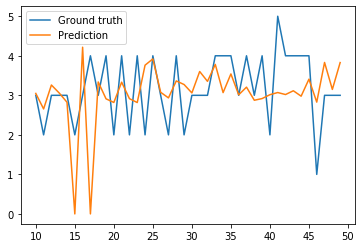

In [34]:
#plotting the results
plt.figure()
plt.plot(range(len(X_train))[10:50], Y_train[10:50], label='Ground truth')
plt.plot(range(len(X_train))[10:50], y_pred_lin_train[10:50], label='Prediction')
plt.legend()
plt.show()

In [35]:
#predicint the results on the test set
y_pred_lin_test=results.predict(X_test)

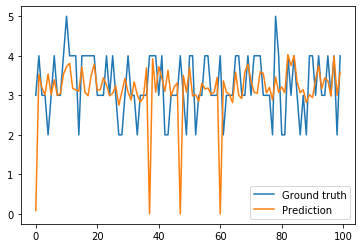

In [36]:
#plotting the results
plt.figure()
plt.plot(range(len(X_test))[0:100], Y_test[0:100], label='Ground truth')
plt.plot(range(len(X_test))[0:100], y_pred_lin_test[0:100], label='Prediction')
plt.legend()
plt.show()

# OSR2 and MAE for Linear Regression model 

In [37]:
#computing OSR2 and MAE
OSR2_lin = np.linalg.norm(y_pred_lin_test - Y_test)**2
print('OSR2 for the linear model is : '+str(OSR2_lin))
MAE_lin = np.linalg.norm(y_pred_lin_test - Y_test,1)
print('MAE for the linear model is : '+str(MAE_lin))

OSR2 for the linear model is : 3255.274797420844
MAE for the linear model is : 2047.2048810046956


# Classfication tree model + Cross Validation 

Here I am building a Decicion Tree Classifier. I am choosing the parameters as shown below in the cell. Morevover, I am going to choose 
the complexity parameter through cross-validation. 
I choose a 5-fold cross validation to compute the score of each model, then I aggregate the results by taking the mean.
I will repeat this operation for several values of cc_alpha, and then choose the one that maximizes the score. 

In [48]:
#create a cross-validation function
def cv_training(data,ccp_alpha, criterion, splitter, mdepth, doprint=False):
    kf=KFold(n_splits=5, shuffle=True, random_state=2)
    X=data.drop("stars", axis=1)
    Y=data["stars"]
    
    model=tree.DecisionTreeClassifier(criterion=criterion, 
                                        splitter=splitter,
                                        max_depth=mdepth,
                                        random_state=0, 
                                        ccp_alpha=ccp_alpha
                                  )
    scores=[]
    models=[]
    for train_index, test_index in kf.split(X):
        X_train_cv, X_val=X.iloc[train_index], X.iloc[test_index]
        Y_train_cv, Y_val=Y.iloc[train_index], Y.iloc[test_index]
        clf=model.fit(X_train_cv, Y_train_cv)
        y_pred_tr=clf.predict(X_train_cv)
        y_pred_val=clf.predict(X_val)
        if doprint:
            print("---------------------------------")
            print("Current value of ccp-alpha: ", ccp_alpha)
            print('Classes: ', clf.classes_)
            print('Tree Depth: ', clf.tree_.max_depth)
            print('No. of leaves: ', clf.tree_.n_leaves)
            print('No. of features: ', clf.n_features_in_)
            print("---------------------------------")
            print("Results of the model on the training data data")
            print(classification_report(y_true=Y_train_cv, y_pred=y_pred_tr))
            print("---------------------------------")
            print("Results of the model on the validation data data")
            print(classification_report(y_true=Y_val, y_pred=y_pred_val))
        scores.append(clf.score(X_val, Y_val))
        models.append(clf)
        best_score = max(scores)
        index_best = scores.index(best_score)
        best_model = models[index_best]
    return(np.mean(scores), scores, best_model)
    

In [49]:
cv_training(train_data, ccp_alpha=0.001, criterion="gini", splitter="best", mdepth=15, doprint=False)[0]

0.47959218945589255

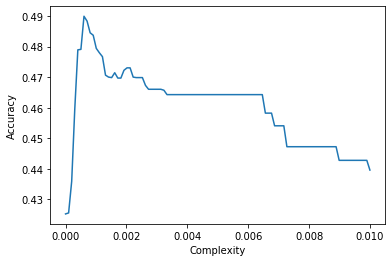

0.01


In [50]:
#10-fold
alphas=[]
accs=[]
for alpha in np.linspace(0, 0.01, num=100):
    alphas.append(alpha)
    accs.append(cv_training(train_data, ccp_alpha=alpha, criterion="gini", splitter="best", mdepth=15, doprint=False)[0])

plt.figure()
plt.plot(alphas, accs)
plt.xlabel('Complexity')
plt.ylabel('Accuracy')
plt.show()

print(max(alphas))

In [51]:
tree_model = cv_training(train_data, ccp_alpha=0.01, criterion="gini", splitter="best", mdepth=20, doprint=False)[-1]

In [52]:
y_pred_tree_test = tree_model.predict(X_test)

/Users/ghitaalami/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- const
Feature names seen at fit time, yet now missing:
- fourOrAbove

  warnings.warn(message, FutureWarning)


# OSR2 and MAE for Tree model 

In [53]:
OSR2_tree = np.linalg.norm(y_pred_tree_test - Y_test)**2
print('OSR2 for the tree model is : '+str(OSR2_tree))
MAE_tree = np.linalg.norm(y_pred_tree_test - Y_test,1)
print('MAE for the tree model is : '+str(MAE_tree))

OSR2 for the tree model is : 2204.0
MAE for the tree model is : 1850.0


# Transforming the problem into a binary classification task

Regression may not be the most appropriate modeling technique for this data. In
particular, it is plausible that restaurants may be mostly concerned with ensuring that their
star rating is high enough and not particularly concerned with precisely predicting the value
of this rating. Therefore, let us instead consider a classification problem where the goal is to
predict if the star rating is greater than or equal to 4 or not.

In [57]:
#modifying the data to make it fit with the previous description 
train_data["fourOrAbove"] = train_data["stars"].apply(lambda x : 1 if x>=4 else 0)
test_data["fourOrAbove"] = test_data["stars"].apply(lambda x : 1 if x>=4 else 0)
y_train , X_train = train_data['fourOrAbove'] , train_data.drop(columns = ['stars','fourOrAbove'])
y_test , X_test = test_data['fourOrAbove'] , test_data.drop(columns = ['stars','fourOrAbove'])
X_train , X_test = sm.add_constant(X_train).astype(int) , sm.add_constant(X_test).astype(int)

/Users/ghitaalami/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/ghitaalami/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [58]:
y_pred_lin , y_pred_reg_tree = [1 if x>=4 else 0  for x in y_pred_lin_test ] , [1 if x>=4 else 0  for x in y_pred_tree_test ]

/Users/ghitaalami/opt/anaconda3/lib/python3.7/site-packages/seaborn/utils.py:538: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(values).astype(np.float)


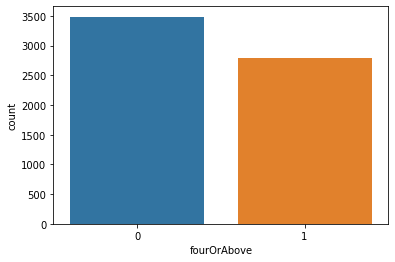

In [83]:
#plotting the distribution of the train labels 
plt.figure()
sns.countplot(y_train)
plt.show()

/Users/ghitaalami/opt/anaconda3/lib/python3.7/site-packages/seaborn/utils.py:538: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(values).astype(np.float)


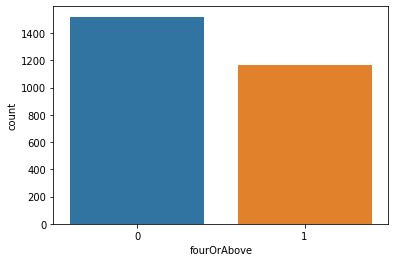

In [84]:
#plotting the distribution of the train labels 
plt.figure()
sns.countplot(y_test)
plt.show()

# Choosing the target metric 

Since what matters to us is the classification itself, not its precision of recall, and since, given the above graph, the 
dataset is not really imbalanced, working with the accuracy metric is not a bad idea. 

# Logistic Regression model 

In [59]:
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.604944
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            fourOrAbove   No. Observations:                 6272
Model:                          Logit   Df Residuals:                     6246
Method:                           MLE   Df Model:                           25
Date:                Mon, 27 Feb 2023   Pseudo R-squ.:                  0.1193
Time:                        11:09:04   Log-Likelihood:                -3794.2
converged:                       True   LL-Null:                       -4308.3
Covariance Type:            nonrobust   LLR p-value:                6.235e-201
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -0.4067      0.105     -3.88

In [60]:
y_pred_logreg = result.predict(X_test)

# Binary classification tree

In [63]:
alpha_c = []
for cp in np.linspace(0,0.05,100):
    tree_class = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None,class_weight=None,min_samples_leaf=300, random_state=0, ccp_alpha= cp) 
    clf = tree_class.fit(X_train, y_train)  
    alpha_c.append([cp,cross_val_score(tree_class, X_train, y_train, cv=10,scoring='accuracy').mean()])       
alpha_c = np.array(alpha_c) 

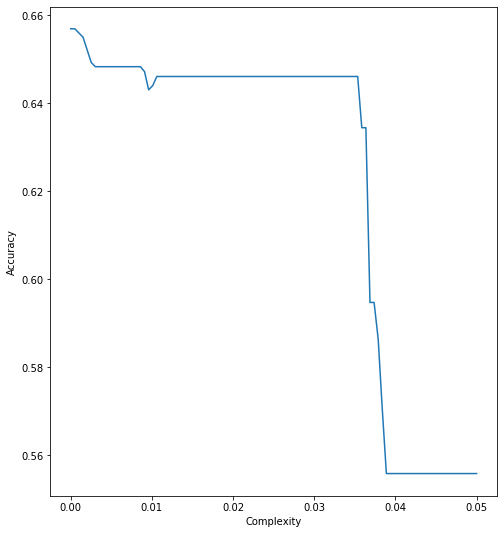

In [64]:
plt.figure(figsize=(8,9))
plt.plot(alpha_c[:,0],alpha_c[:,1])
plt.xlabel('Complexity')
plt.ylabel('Accuracy')
plt.show()

In [65]:
tree_class = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None,class_weight=None,min_samples_leaf=1000, random_state=0,ccp_alpha=0.008)                                
clf = tree_class.fit(X_train, y_train)
y_pred_cl_tree = tree_class.predict(X_test)
y_predtrain_cl_tree = tree_class.predict(X_train)

print('*************** Tree Summary ***************')
print('Classes: ', clf.classes_)
print('Tree Depth: ', clf.tree_.max_depth)
print('No. of leaves: ', clf.tree_.n_leaves)
print('No. of features: ', clf.n_features_in_)
print('--------------------------------------------------------')
print("")

*************** Tree Summary ***************
Classes:  [0 1]
Tree Depth:  2
No. of leaves:  3
No. of features:  26
--------------------------------------------------------



In [66]:
print('*************** Evaluation on Test Data ***************')
score_te = tree_class.score(X_test, y_test)
print('Accuracy Score: ', score_te)
# Look at classification report to evaluate the model
print(classification_report(y_test, y_pred_cl_tree))
print('--------------------------------------------------------')
print("")

print('*************** Evaluation on Training Data ***************')
score_tr = tree_class.score(X_train, y_train)
print('Accuracy Score: ', score_tr)
# Look at classification report to evaluate the model
print(classification_report(y_train, y_predtrain_cl_tree))
print('--------------------------------------------------------')

*************** Evaluation on Test Data ***************
Accuracy Score:  0.6294642857142857
              precision    recall  f1-score   support

           0       0.66      0.70      0.68      1520
           1       0.58      0.54      0.56      1168

    accuracy                           0.63      2688
   macro avg       0.62      0.62      0.62      2688
weighted avg       0.63      0.63      0.63      2688

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.6505102040816326
              precision    recall  f1-score   support

           0       0.68      0.71      0.69      3486
           1       0.61      0.57      0.59      2786

    accuracy                           0.65      6272
   macro avg       0.65      0.64      0.64      6272
weighted avg       0.65      0.65      0.65      6272

--------------------------------------------------------


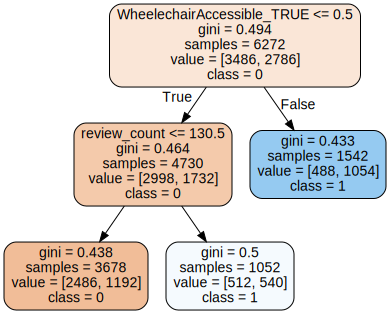

In [67]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=X_train.columns, class_names=[str(list(clf.classes_)[0]), str(list(clf.classes_)[1])],filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

# Conclusion

If I was a data scientist working for Yelp and I had been tasked
with producing a “how to guide” for Las Vegas restaurants, which is supposed to include
tips for actions restaurants may take to achieve a high star rating, those are the 3 tips
I would give to the restaurant owners. 

### First advice: Dealing with Wifi

Looking at the coefficients of the logistic regression made to classify the restaurants that have 4 stars and above or lower, here is what I noticed.
It seems like for certain features the signs of the coefficients of the True and False of the same feature have the same sign, and other have opposite signs. 
My first suggestion is to work with the features for which the one hot encoded booleans have opposite signs. Because, it is more interpretable. A positive coefficient means that we have to make sure the restaurants offers that feature and a negative sign suggests it should not be present in the restaurant. For the features for which the one hot encoded booleans have the same sign, it is much more difficult to interpret. It seems like in a certain measure, the True is important for some customers, and to another exxtent, it is important for other customers. So, it really depends on the restaurant and the type of customers they want to attract.

The Wifi feature is pretty straighforward to interpret given the coefficients: 
- WiFi_'free' : 0.2203
- WiFi_'no' : 0.1339 
- WiFi_'paid': -0.6393 

$\textbf{It seems like not offering Wifi to customers is a better idea than offering one that is paid. My advice for the owners: either you cna afford to provide free Wifi, or do not provide it at all.}$

/Users/ghitaalami/opt/anaconda3/lib/python3.7/site-packages/seaborn/utils.py:538: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(values).astype(np.float)
/Users/ghitaalami/opt/anaconda3/lib/python3.7/site-packages/seaborn/utils.py:538: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(values).astype(np.float)
/Users/ghita

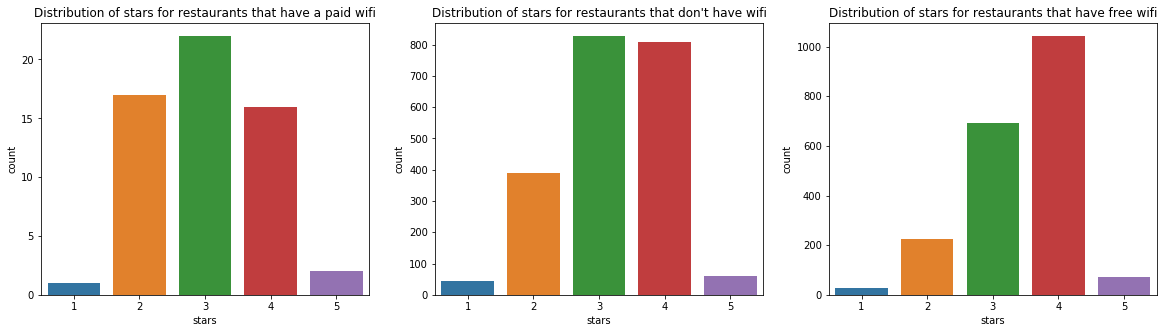

In [ ]:
wifi_paid = train_data[train_data["WiFi_\'paid\'"]==1]
wifi_no = train_data[train_data["WiFi_\'no\'"]==1]
wifi_free =train_data[train_data["WiFi_\'free\'"]==1]

plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
sns.countplot(wifi_paid["stars"])
plt.title('Distribution of stars for restaurants that have a paid wifi')
plt.subplot(1,3,2)
sns.countplot(wifi_no["stars"])
plt.title("Distribution of stars for restaurants that don't have wifi")
plt.subplot(1,3,3)
sns.countplot(wifi_free["stars"])
plt.title("Distribution of stars for restaurants that have free wifi")
plt.show()

### Second advice: Dealing with Caters

Along the same vein, looking at the presence or absence of Caters, here is what we find: 
- Caters_FALSE : -0.3222
- Caters_TRUE : 0.1483 

$\textbf{Second advice for the owners: make sure you do have Caters at your restaurant.}$

/Users/ghitaalami/opt/anaconda3/lib/python3.7/site-packages/seaborn/utils.py:538: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(values).astype(np.float)
/Users/ghitaalami/opt/anaconda3/lib/python3.7/site-packages/seaborn/utils.py:538: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(values).astype(np.float)


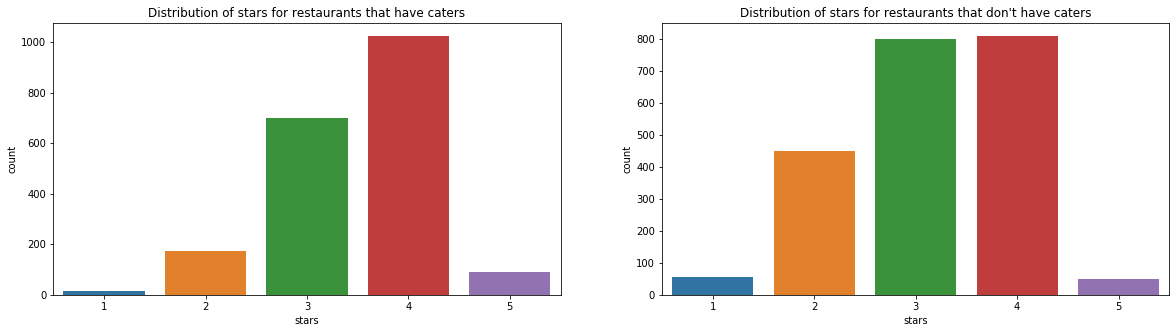

In [105]:
cater_yes = train_data[train_data["Caters_TRUE"]==1]
cater_no = train_data[train_data["Caters_FALSE"]==1]


plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.countplot(cater_yes["stars"])
plt.title('Distribution of stars for restaurants that have caters')
plt.subplot(1,2,2)
sns.countplot(cater_no["stars"])
plt.title("Distribution of stars for restaurants that don't have caters")
plt.show()

### Third advice: Dealing with Reservations 

Finally, given the following coefficients, not working with Reservations harms consequently the rating of the restaurant: 
- RestaurantsReservations_FALSE : -0.3154  
- RestaurantsReservations_TRUE  :  0.0951
On the other hand, having reservations improves a little the model. 

**Third advice fot the owners: have the *possibility* of booking a table at your restaurant will improve your rating a lot. Only working with reservations will improve it just a little bit.**

/Users/ghitaalami/opt/anaconda3/lib/python3.7/site-packages/seaborn/utils.py:538: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(values).astype(np.float)
/Users/ghitaalami/opt/anaconda3/lib/python3.7/site-packages/seaborn/utils.py:538: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(values).astype(np.float)


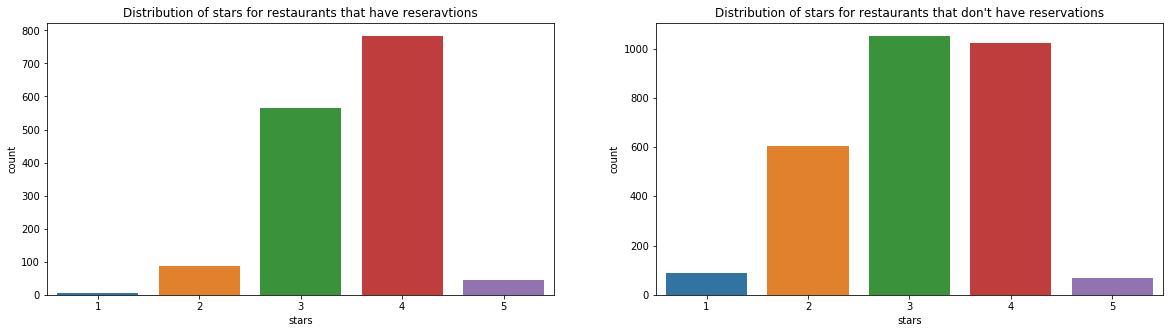

In [107]:
re_yes = train_data[train_data["RestaurantsReservations_TRUE"]==1]
re_no = train_data[train_data["RestaurantsReservations_FALSE"]==1]


plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.countplot(re_yes["stars"])
plt.title('Distribution of stars for restaurants that have reseravtions')
plt.subplot(1,2,2)
sns.countplot(re_no["stars"])
plt.title("Distribution of stars for restaurants that don't have reservations")
plt.show()